## EDA (Análisis Exploratorio de los Datos)

#### *Mediante el siguiente análisis buscamos encontrar un Modelo de Clasificación que mejor se ajuste a un Sistema de Recomendación de Películas por Similaridad.*



EDA permitirá explorar el conjunto de datos de películas con el fin de descubrir características importantes, comprender la distribución y variabilidad de los datos, y obtener conocimientos valiosos que ayuden a diseñar un sistema de recomendación efectivo.

- Exploremos las variables:

In [42]:
# Creamos el DataFrame en base al csv que nos quedo despues del ETL
import pandas as pd

df = pd.read_csv('movies_df_etl.csv')

In [43]:
# un vistazo a las columnas y tipos de datos 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45451 entries, 0 to 45450
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  4497 non-null   object 
 1   budget                 45451 non-null  int64  
 2   genres                 45451 non-null  object 
 3   id                     45451 non-null  int64  
 4   original_language      45440 non-null  object 
 5   overview               44510 non-null  object 
 6   popularity             45451 non-null  float64
 7   production_companies   45451 non-null  object 
 8   production_countries   45451 non-null  object 
 9   release_date           45451 non-null  object 
 10  revenue                45451 non-null  float64
 11  runtime                45205 non-null  float64
 12  spoken_languages       45451 non-null  object 
 13  status                 45371 non-null  object 
 14  tagline                20425 non-null  object 
 15  ti

## Vamos a analizar como se distribuyen los votos por peliculas

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
from wordcloud import WordCloud, ImageColorGenerator
warnings.filterwarnings('ignore')
sns.set_theme()

### La cantidad de votos se ve incrementada por el paso del tiempo, siendo las peliculas mas nuevas las mas votadas.

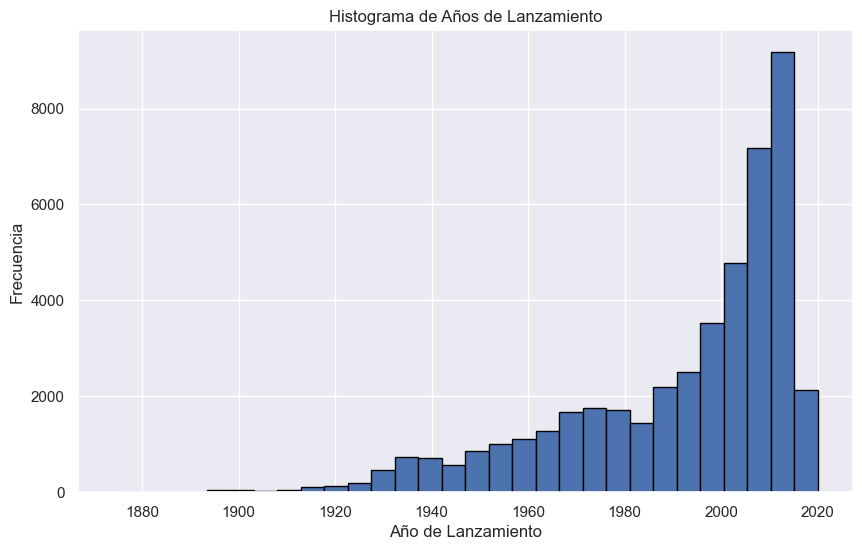

In [45]:

# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(10, 6))

# Crear un histograma
ax.hist(df['release_year'], bins=30, edgecolor='black')

# Configurar etiquetas y título
ax.set_xlabel('Año de Lanzamiento')
ax.set_ylabel('Frecuencia')
ax.set_title('Histograma de Años de Lanzamiento')


# Mostrar el gráfico
plt.show()


### Haremos una matriz de correlación

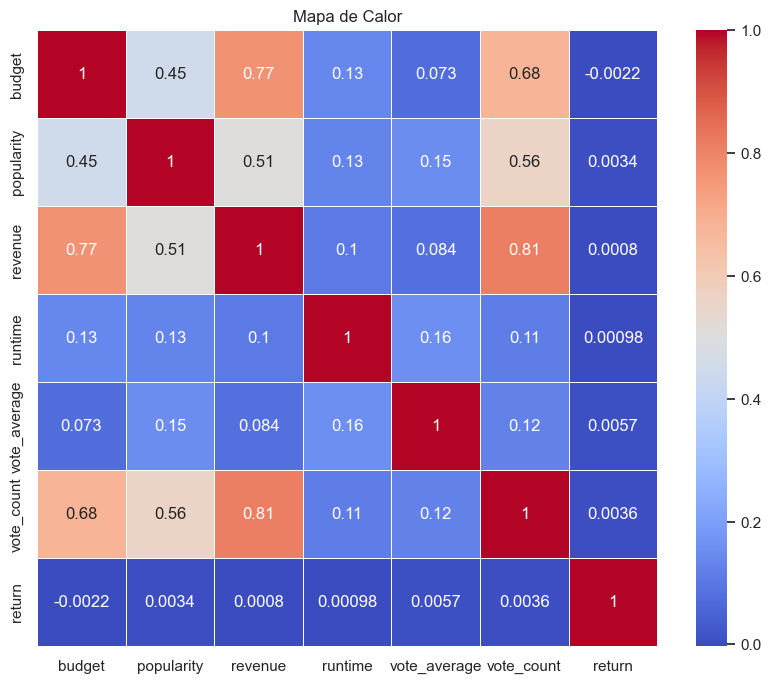

In [46]:
# Seleccionar las columnas numéricas
numeric_columns = ['budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count', 'return']

# Crear una subselección del DataFrame
df_numeric = df[numeric_columns]

# Calcular la matriz
correlation_matrix = df_numeric.corr()

# Visualización  mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Calor')
plt.show()



#### Como se puede ver, la relación más destacada se presenta entre las variables 'revenue' y 'vote_average'. Esto sugiere que a medida que el desempeño de una película en términos de votaciones mejora, su recaudación tiende a ser mayor. Además, se aprecia una marcada correlación entre 'budget' y 'revenue', lo que implica que las películas con un presupuesto más elevado tienden a generar mayores ingresos en taquilla.

### Relación (remuneración) en función del tiempo

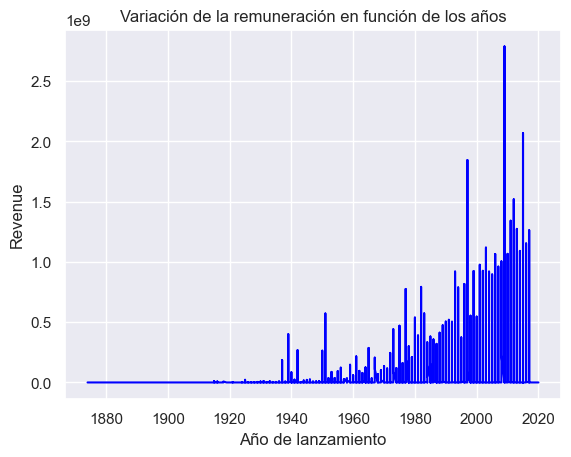

In [47]:
import matplotlib.pyplot as plt

# Ordenar DataFrame según año de lanzamiento (release_year)
df_sorted = df.sort_values('release_year')

# Gráfico de línea continua revenue vs año de lanzamiento
plt.plot(df_sorted['release_year'], df_sorted['revenue'], color='blue', linestyle='-')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Revenue')
plt.title('Variación de la remuneración en función de los años')
plt.grid(True)  
plt.show()


### Vamos a ver si coincide con los presupuestos destinados a producir peliculas

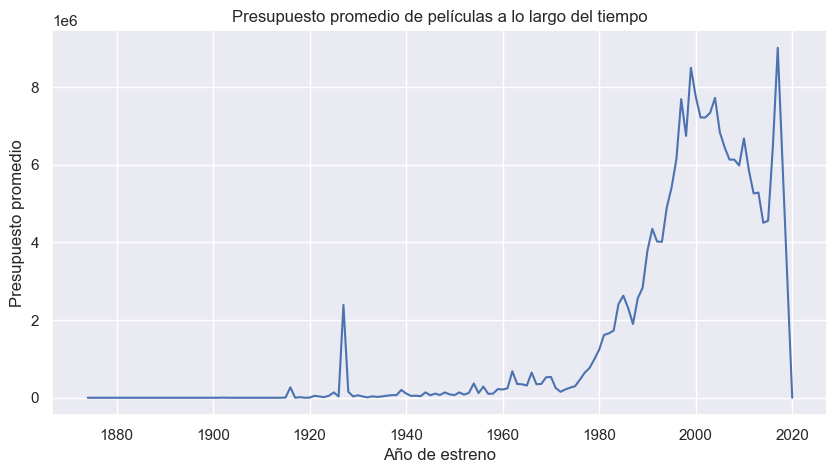

In [48]:
df['release_year'] = pd.to_numeric(df['release_year'])

# Agrupar los datos por año y calcular la media del presupuesto
presupuesto = df.groupby('release_year')['budget'].mean()

# Figuras y ejes del gráfico
fig, ax = plt.subplots(figsize=(10, 5))

# Presupuesto promedio a lo largo del tiempo
ax.plot(presupuesto)

# Etiquetas del gráfico

ax.set_xlabel('Año de estreno')
ax.set_ylabel('Presupuesto promedio')
ax.set_title('Presupuesto promedio de películas a lo largo del tiempo')

# Mostrar el gráfico
plt.show()

### Generamos una nube de palabras de la columna 'title'

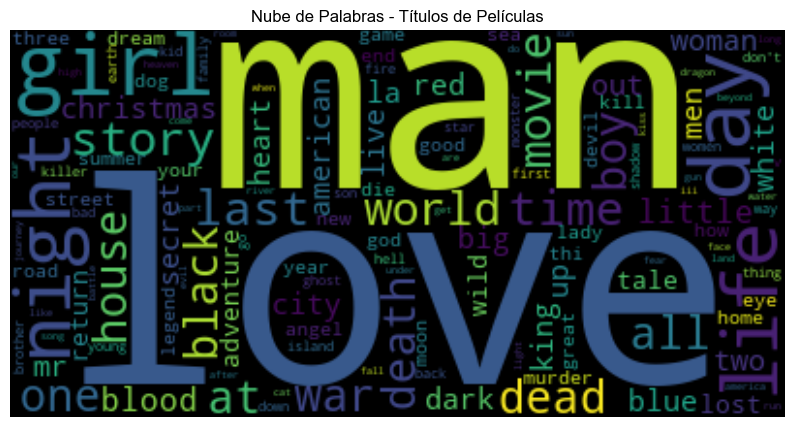

In [49]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

title_words = ' '.join(df['title'])
title_words = title_words.lower()

# Sacamos algunas palabras que no aportan
stopwords = ['de', 'it', 'be', 'who', 'ii', 'le', 'no', "to", "of", "the", "and", "&", ":", "in", "for", "on", "a", "by", "with", "an", "into", "from", 'i', 'not', 'that', 'is', 'me', 'my', 'you', 'what']

# Configurar la nube de palabras
wordcloud = WordCloud(stopwords=stopwords, background_color='black', colormap='viridis', contour_width=0.5, contour_color='white').generate(title_words)

# Configurar la figura
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras - Títulos de Películas', color='black')  # Cambiar el color del título
plt.show()


### Criterio de eliminación por el tipo de información que aporta:
### - Las variables no aportan información acerca de la naturaleza del contenido de cada película
### - Las variables no explican la similaridad de contenido entre las películas
### A findes de poder montar el modelo usaremos las 5.000 peliculas con mayor popularidad

In [50]:
df = df.drop('budget', axis = 1)
df = df.drop('production_countries', axis = 1)
df = df.drop('revenue', axis = 1)
df = df.drop('release_year', axis = 1)
df = df.drop('runtime', axis = 1)
df = df.drop('spoken_languages', axis = 1)
df = df.drop('release_date', axis = 1)
df = df.drop('return', axis =1)
df = df.drop('original_language',axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45451 entries, 0 to 45450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  4497 non-null   object 
 1   genres                 45451 non-null  object 
 2   id                     45451 non-null  int64  
 3   overview               44510 non-null  object 
 4   popularity             45451 non-null  float64
 5   production_companies   45451 non-null  object 
 6   status                 45371 non-null  object 
 7   tagline                20425 non-null  object 
 8   title                  45451 non-null  object 
 9   vote_average           45451 non-null  float64
 10  vote_count             45451 non-null  float64
 11  director               45451 non-null  object 
dtypes: float64(3), int64(1), object(8)
memory usage: 4.2+ MB


In [51]:
print('las mas populares contienen', df['popularity'].max() ,' y el promedio de popularidad es ',df['popularity'].mean())

las mas populares contienen 547.488298  y el promedio de popularidad es  2.9268873335240153


### Dejaremos los 5000 registros mas populares

In [52]:
df = df.sort_values('popularity', ascending=False).head(5000)
df.shape

(5000, 12)

In [53]:
# con el nuevo dataframe para el modelo
print('Para el nuevo dataframe a usar en el modelo el promedio de popularidad es ',df['popularity'].mean())

Para el nuevo dataframe a usar en el modelo el promedio de popularidad es  12.772520041


In [54]:
df.to_csv('df_modelo.csv')

#### Vamos a buscar en los sistemas de recomendación de películas. Aquí, una posibilidad de modelos de machine learning (ML) se despliega ante nosotros, cada uno listo para ser considerado. Pero, ¿qué variables debemos sopesar con cuidado? Ah, sí, las siempre intrigantes 'popularidad' y 'título'.

#### Un vistazo a tres posibles escenarios:

### Escenario Eficiente:
#### Dos modelos: KNN y el Gráfico de Palabras. La Bolsa de Palabras (BoW) es una poderosa tecnica, capaz de tejer vínculos cercanos entre las palabras de un conjunto, en este caso, relacionando los títulos cinematográficos con las prosas de las reseñas.

### Escenario Efectivo:
#### El protagonismo recae en los Vectores del Coseno, a las variables 'popularidad' y 'título'. Este enfoque, une lo textual y lo numérico de las películas. Mientras las características textuales capturan su esencia y contexto, la numérica (nada menos que la popularidad) podría inclinar la balanza hacia preferencias populares en las recomendaciones.

### Escenario Complejo:
#### Redes Neuronales Convolucionales (CNN), donde "título" y "popularidad" darián lugar a una representación híbrida, mezcla de texto y números. Las capas convolucionales y densas ejecutan, puliendo y clasificando. Y más sus técnicas de validación, para juzgar nuestro modelo."



### Atento a la capacidad de procesamiento nos inclinamos por un Modelo de Similitud de los Cosenos, usando la distancia de los vectores a fin de recomendar, vamos a utilizar la columna ['Title] para que nos genere un sistema sencillo y facil de montar en una API.